Nama: Riofebri Prasetia
NIM: 221911192
Kelas: 3SI1
Mata Kuliah: Data Mining Knowledge Managament
Hackaton

# **Prepare**

# **Library yang digunakan dan import data**

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import neighbors

**Load Data**

Data yang digunakan adalah data Status Kelengkapan Imunisasi

In [2]:
#from google.colab import files

#uploaded = files.upload()

In [3]:
#Import data
url = "https://raw.githubusercontent.com/rii92/datmin-tugas-akhir/main/Covid-19%20Rio/1-s2.0-S2352340921003826-mmc1.xlsx%20-%20Sheet1.csv"
df = pd.read_csv(url)
df

,Sex,Age,Professions,Education,Living Area,1. Swelling,2. Redness,3. Itching,4. Fever,5. Headache,6. Muscle Pain,7. Tiredness,8. Coughing,9. Diarrhea,10. Nausea and vomiting,11. Breathlessness,12. Joint Pain,13. Fainted,14. Anaphylactic Reaction,15. Tingling,16. Swollen Lymph Nodes,Symptoms time
0,Male,51-55 years,Medical specialist,Master degree,Downtown,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,None
1,Female,41-45 years,Non medical staff,Master degree,Downtown,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,None
2,Male,56-60 years,Medical doctor,Master degree,Downtown,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,< 24 hours
3,Male,26-30 years,Non medical staff,Bachelor degree,Downtown,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None
4,Female,31-35 years,Medical doctor,Bachelor degree,Downtown,No,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,< 24 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Male,26-30 years,Medical doctor,Bachelor degree,Downtown,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,24-72 hours
836,Male,26-30 years,Medical doctor,Bachelor degree,Downtown,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,< 24 hours
837,Female,26-30 years,Medical doctor,Bachelor degree,Downtown,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,< 24 hours
838,Female,26-30 years,Medical doctor,Bachelor degree,Downtown,No,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,24-72 hours


In [4]:
df.keys()

Index(['Sex', 'Age', 'Professions', 'Education', 'Living Area', '1. Swelling',
       '2. Redness', '3. Itching', '4. Fever', '5. Headache', '6. Muscle Pain',
       '7. Tiredness', '8. Coughing', '9. Diarrhea', '10. Nausea and vomiting',
       '11. Breathlessness', '12. Joint Pain', '13. Fainted',
       '14. Anaphylactic Reaction', '15. Tingling', '16. Swollen Lymph Nodes',
       'Symptoms time'],
      dtype='object')

Lihat info tabel dataset nya terlebih dahulu

In [5]:
print(df['Symptoms time'])

0             None
1             None
2       < 24 hours
3             None
4       < 24 hours
          ...     
835    24-72 hours
836     < 24 hours
837     < 24 hours
838    24-72 hours
839           None
Name: Symptoms time, Length: 840, dtype: object


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Sex                        840 non-null    object
 1   Age                        840 non-null    object
 2   Professions                840 non-null    object
 3   Education                  840 non-null    object
 4   Living Area                840 non-null    object
 5   1. Swelling                840 non-null    object
 6   2. Redness                 840 non-null    object
 7   3. Itching                 840 non-null    object
 8   4. Fever                   840 non-null    object
 9   5. Headache                840 non-null    object
 10  6. Muscle Pain             840 non-null    object
 11  7. Tiredness               840 non-null    object
 12  8. Coughing                840 non-null    object
 13  9. Diarrhea                840 non-null    object
 14  10. Nausea

# **Lakukan Preprocesing**

In [7]:
#untuk data train
# dapatkan beberapa informasi tiap baris
print(df)

# describe the data
df.describe()

        Sex          Age  ... 16. Swollen Lymph Nodes Symptoms time
0      Male  51-55 years  ...                      No          None
1    Female  41-45 years  ...                      No          None
2      Male  56-60 years  ...                      No    < 24 hours
3      Male  26-30 years  ...                      No          None
4    Female  31-35 years  ...                      No    < 24 hours
..      ...          ...  ...                     ...           ...
835    Male  26-30 years  ...                      No   24-72 hours
836    Male  26-30 years  ...                      No    < 24 hours
837  Female  26-30 years  ...                      No    < 24 hours
838  Female  26-30 years  ...                      No   24-72 hours
839    Male  26-30 years  ...                      No          None

[840 rows x 22 columns]


,Sex,Age,Professions,Education,Living Area,1. Swelling,2. Redness,3. Itching,4. Fever,5. Headache,6. Muscle Pain,7. Tiredness,8. Coughing,9. Diarrhea,10. Nausea and vomiting,11. Breathlessness,12. Joint Pain,13. Fainted,14. Anaphylactic Reaction,15. Tingling,16. Swollen Lymph Nodes,Symptoms time
count,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840
unique,2,10,5,4,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,4
top,Female,26-30 years,Nurse,Bachelor degree,Downtown,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None
freq,570,205,363,632,594,763,823,840,827,654,507,539,774,814,827,829,827,839,837,782,836,374


Cek apakah ada baris yang mengandung null?

In [8]:
#ubah data NaN jadi np.nan
df = df.replace('NaN', np.nan)

df.isna().sum()

Sex                          0
Age                          0
Professions                  0
Education                    0
Living Area                  0
1. Swelling                  0
2. Redness                   0
3. Itching                   0
4. Fever                     0
5. Headache                  0
6. Muscle Pain               0
7. Tiredness                 0
8. Coughing                  0
9. Diarrhea                  0
10. Nausea and vomiting      0
11. Breathlessness           0
12. Joint Pain               0
13. Fainted                  0
14. Anaphylactic Reaction    0
15. Tingling                 0
16. Swollen Lymph Nodes      0
Symptoms time                0
dtype: int64

In [9]:
df.fillna(df.median(), inplace=True)
df.isna().sum()

Sex                          0
Age                          0
Professions                  0
Education                    0
Living Area                  0
1. Swelling                  0
2. Redness                   0
3. Itching                   0
4. Fever                     0
5. Headache                  0
6. Muscle Pain               0
7. Tiredness                 0
8. Coughing                  0
9. Diarrhea                  0
10. Nausea and vomiting      0
11. Breathlessness           0
12. Joint Pain               0
13. Fainted                  0
14. Anaphylactic Reaction    0
15. Tingling                 0
16. Swollen Lymph Nodes      0
Symptoms time                0
dtype: int64

Untuk Metode K-NearestNeighbor dalam mengatasi nilai null yaitu dengan cara dilakukan imputasi dengan cara isi nilai null dengan nilai median pada kolom yang mengandung null

In [10]:
data = pd.DataFrame(df)

tabel menjadi dataframe

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for x in data.columns:
  data[x] = le.fit_transform(data[x])

data.head(10)

,Sex,Age,Professions,Education,Living Area,1. Swelling,2. Redness,3. Itching,4. Fever,5. Headache,6. Muscle Pain,7. Tiredness,8. Coughing,9. Diarrhea,10. Nausea and vomiting,11. Breathlessness,12. Joint Pain,13. Fainted,14. Anaphylactic Reaction,15. Tingling,16. Swollen Lymph Nodes,Symptoms time
0,1,6,1,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,3
1,0,4,3,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3
2,1,7,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,0,2,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1
5,1,5,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
7,0,7,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3
8,0,3,3,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
9,1,6,4,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1


Melakukan pengkodean value untuk dilakukan standarisasi

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_data = pd.DataFrame(scaler.fit_transform(data))

std_data.columns = data.columns


Melakukan Standarisasi/normalisasi data

In [13]:
std_data['Symptoms time'] = le.fit_transform(std_data['Symptoms time'])
std_data

,Sex,Age,Professions,Education,Living Area,1. Swelling,2. Redness,3. Itching,4. Fever,5. Headache,6. Muscle Pain,7. Tiredness,8. Coughing,9. Diarrhea,10. Nausea and vomiting,11. Breathlessness,12. Joint Pain,13. Fainted,14. Anaphylactic Reaction,15. Tingling,16. Swollen Lymph Nodes,Symptoms time
0,1.452966,1.694514,-1.351381,1.241296,-0.643538,-0.317675,-0.143722,0.0,-0.125377,-0.533295,1.233905,1.338170,-0.292013,-0.178721,-0.125377,-0.115191,-0.125377,-0.034524,-0.059868,-0.272339,-0.069171,3
1,-0.688247,0.674892,0.093762,1.241296,-0.643538,-0.317675,-0.143722,0.0,-0.125377,-0.533295,1.233905,-0.747289,-0.292013,-0.178721,-0.125377,-0.115191,-0.125377,-0.034524,-0.059868,-0.272339,-0.069171,3
2,1.452966,2.204325,-2.073953,1.241296,-0.643538,-0.317675,-0.143722,0.0,-0.125377,-0.533295,1.233905,-0.747289,-0.292013,-0.178721,-0.125377,-0.115191,-0.125377,-0.034524,-0.059868,-0.272339,-0.069171,1
3,1.452966,-0.854540,0.093762,-0.557994,-0.643538,-0.317675,-0.143722,0.0,-0.125377,-0.533295,-0.810435,-0.747289,-0.292013,-0.178721,-0.125377,-0.115191,-0.125377,-0.034524,-0.059868,-0.272339,-0.069171,3
4,-0.688247,-0.344729,-2.073953,-0.557994,-0.643538,-0.317675,-0.143722,0.0,-0.125377,-0.533295,1.233905,1.338170,3.424511,-0.178721,-0.125377,-0.115191,-0.125377,-0.034524,-0.059868,-0.272339,-0.069171,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1.452966,-0.854540,-2.073953,-0.557994,-0.643538,-0.317675,-0.143722,0.0,-0.125377,-0.533295,1.233905,1.338170,-0.292013,-0.178721,-0.125377,-0.115191,-0.125377,-0.034524,-0.059868,-0.272339,-0.069171,0
836,1.452966,-0.854540,-2.073953,-0.557994,-0.643538,-0.317675,-0.143722,0.0,-0.125377,-0.533295,1.233905,-0.747289,-0.292013,-0.178721,-0.125377,-0.115191,-0.125377,-0.034524,-0.059868,-0.272339,-0.069171,1
837,-0.688247,-0.854540,-2.073953,-0.557994,-0.643538,-0.317675,-0.143722,0.0,-0.125377,1.875134,1.233905,-0.747289,-0.292013,-0.178721,-0.125377,-0.115191,-0.125377,-0.034524,-0.059868,-0.272339,-0.069171,1
838,-0.688247,-0.854540,-2.073953,-0.557994,-0.643538,-0.317675,-0.143722,0.0,-0.125377,-0.533295,1.233905,1.338170,3.424511,-0.178721,-0.125377,-0.115191,-0.125377,-0.034524,-0.059868,-0.272339,-0.069171,0


Ubah nilai pada Atribut Y menjadi 0 dan 1 dimana 1 ialah status imunisasi lengkap dan 0 status imunisasi tidak lengkap

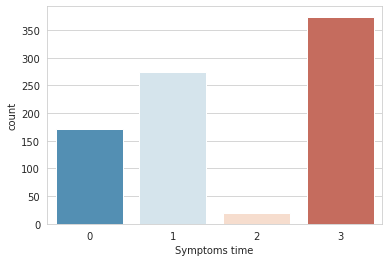

In [14]:
import seaborn as sns

sns.set_style('whitegrid')
sns.countplot(x=data['Symptoms time'],data=data,palette='RdBu_r')

**cek imbalance**
data masih mendekati balance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


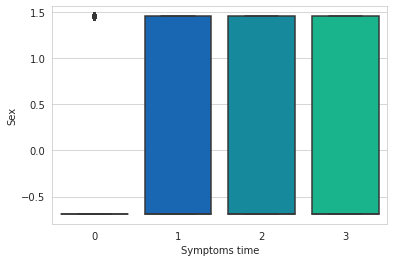

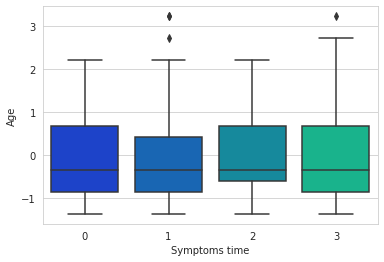

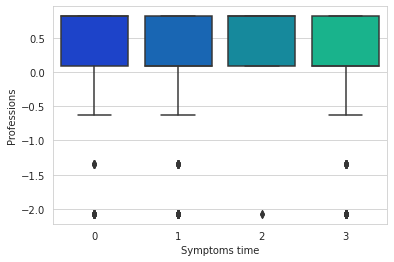

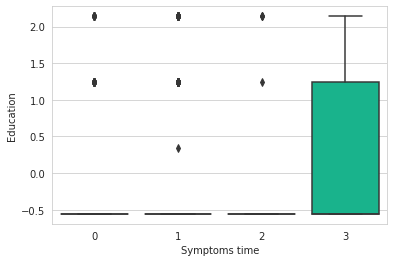

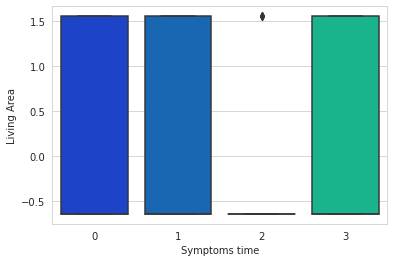

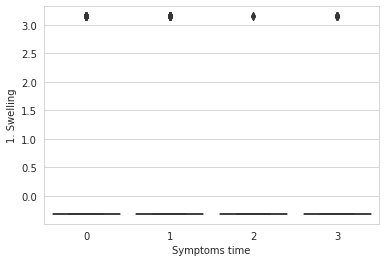

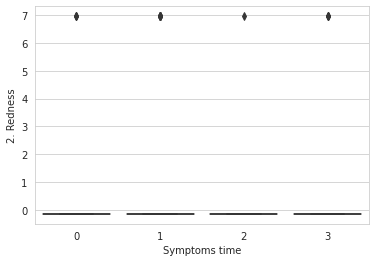

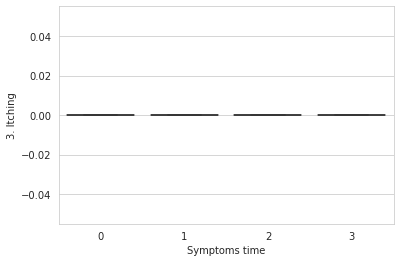

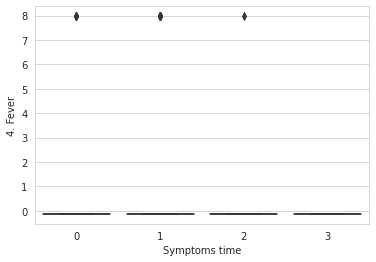

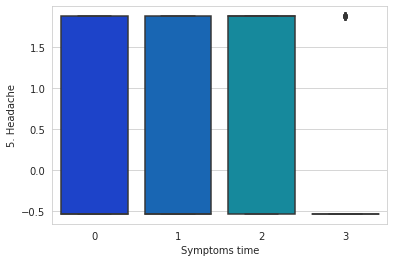

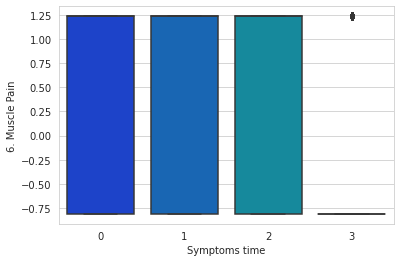

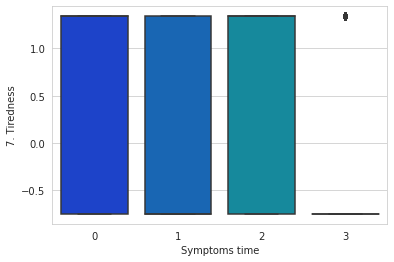

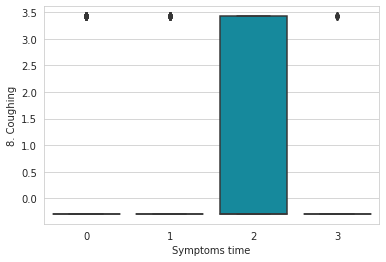

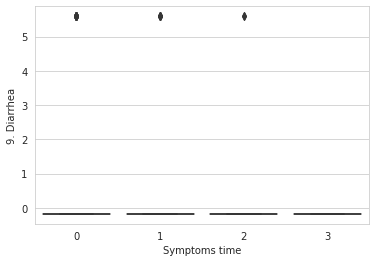

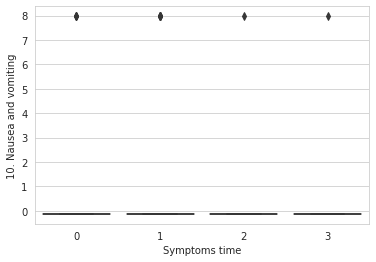

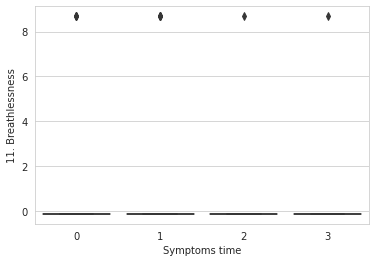

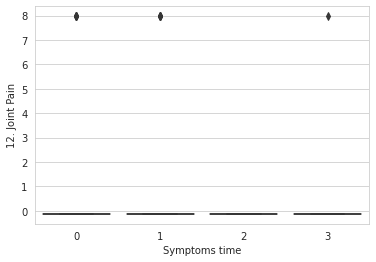

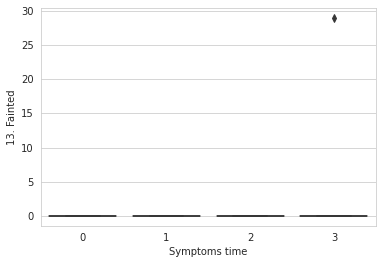

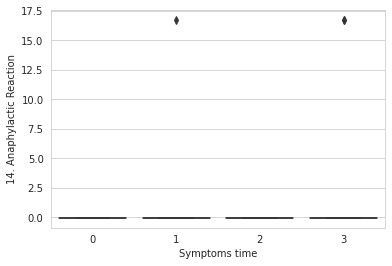

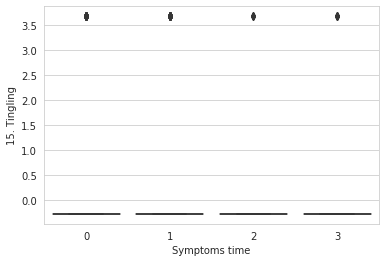

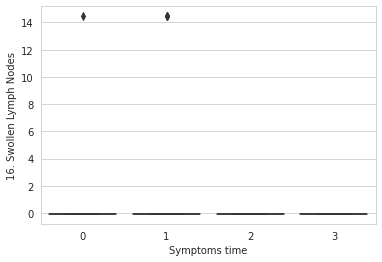

<Figure size 432x288 with 0 Axes>

In [15]:
l=list(std_data.columns[0:755])
for i in range(len(l)-1):
    sns.boxplot(x='Symptoms time',y=l[i], data=std_data, palette='winter')
    plt.figure()

In [16]:
std_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sex                        840 non-null    float64
 1   Age                        840 non-null    float64
 2   Professions                840 non-null    float64
 3   Education                  840 non-null    float64
 4   Living Area                840 non-null    float64
 5   1. Swelling                840 non-null    float64
 6   2. Redness                 840 non-null    float64
 7   3. Itching                 840 non-null    float64
 8   4. Fever                   840 non-null    float64
 9   5. Headache                840 non-null    float64
 10  6. Muscle Pain             840 non-null    float64
 11  7. Tiredness               840 non-null    float64
 12  8. Coughing                840 non-null    float64
 13  9. Diarrhea                840 non-null    float64

Text(0.5, 1.0, 'Dengan Profesi')

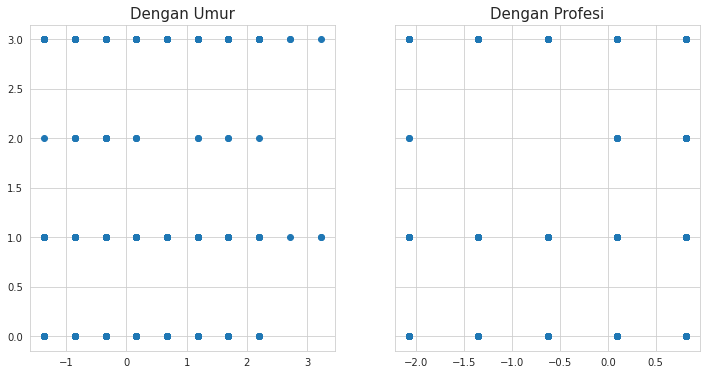

In [17]:
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,6))
ax1.scatter(std_data['Age'],std_data['Symptoms time'])
ax1.set_title("Dengan Umur", fontsize=15)
ax2.scatter(std_data['Professions'],std_data['Symptoms time'])
ax2.set_title("Dengan Profesi", fontsize=15)

In [18]:
std_data.columns

Index(['Sex', 'Age', 'Professions', 'Education', 'Living Area', '1. Swelling',
       '2. Redness', '3. Itching', '4. Fever', '5. Headache', '6. Muscle Pain',
       '7. Tiredness', '8. Coughing', '9. Diarrhea', '10. Nausea and vomiting',
       '11. Breathlessness', '12. Joint Pain', '13. Fainted',
       '14. Anaphylactic Reaction', '15. Tingling', '16. Swollen Lymph Nodes',
       'Symptoms time'],
      dtype='object')

In [19]:
std_data.columns

Index(['Sex', 'Age', 'Professions', 'Education', 'Living Area', '1. Swelling',
       '2. Redness', '3. Itching', '4. Fever', '5. Headache', '6. Muscle Pain',
       '7. Tiredness', '8. Coughing', '9. Diarrhea', '10. Nausea and vomiting',
       '11. Breathlessness', '12. Joint Pain', '13. Fainted',
       '14. Anaphylactic Reaction', '15. Tingling', '16. Swollen Lymph Nodes',
       'Symptoms time'],
      dtype='object')

In [20]:
#std_data = std_data.drop(['3. Itching'], axis = 1)
#std_data = std_data.drop(['12. Joint Pain'], axis = 1)
#std_data = std_data.drop(['13. Fainted'], axis = 1)
#std_data = std_data.drop(['4. Fever'], axis = 1)
#std_data = std_data.drop(['9. Diarrhea'], axis = 1)
#std_data = std_data.drop(['14. Anaphylactic Reaction'], axis = 1)
std_data

,Sex,Age,Professions,Education,Living Area,1. Swelling,2. Redness,3. Itching,4. Fever,5. Headache,6. Muscle Pain,7. Tiredness,8. Coughing,9. Diarrhea,10. Nausea and vomiting,11. Breathlessness,12. Joint Pain,13. Fainted,14. Anaphylactic Reaction,15. Tingling,16. Swollen Lymph Nodes,Symptoms time
0,1.452966,1.694514,-1.351381,1.241296,-0.643538,-0.317675,-0.143722,0.0,-0.125377,-0.533295,1.233905,1.338170,-0.292013,-0.178721,-0.125377,-0.115191,-0.125377,-0.034524,-0.059868,-0.272339,-0.069171,3
1,-0.688247,0.674892,0.093762,1.241296,-0.643538,-0.317675,-0.143722,0.0,-0.125377,-0.533295,1.233905,-0.747289,-0.292013,-0.178721,-0.125377,-0.115191,-0.125377,-0.034524,-0.059868,-0.272339,-0.069171,3
2,1.452966,2.204325,-2.073953,1.241296,-0.643538,-0.317675,-0.143722,0.0,-0.125377,-0.533295,1.233905,-0.747289,-0.292013,-0.178721,-0.125377,-0.115191,-0.125377,-0.034524,-0.059868,-0.272339,-0.069171,1
3,1.452966,-0.854540,0.093762,-0.557994,-0.643538,-0.317675,-0.143722,0.0,-0.125377,-0.533295,-0.810435,-0.747289,-0.292013,-0.178721,-0.125377,-0.115191,-0.125377,-0.034524,-0.059868,-0.272339,-0.069171,3
4,-0.688247,-0.344729,-2.073953,-0.557994,-0.643538,-0.317675,-0.143722,0.0,-0.125377,-0.533295,1.233905,1.338170,3.424511,-0.178721,-0.125377,-0.115191,-0.125377,-0.034524,-0.059868,-0.272339,-0.069171,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1.452966,-0.854540,-2.073953,-0.557994,-0.643538,-0.317675,-0.143722,0.0,-0.125377,-0.533295,1.233905,1.338170,-0.292013,-0.178721,-0.125377,-0.115191,-0.125377,-0.034524,-0.059868,-0.272339,-0.069171,0
836,1.452966,-0.854540,-2.073953,-0.557994,-0.643538,-0.317675,-0.143722,0.0,-0.125377,-0.533295,1.233905,-0.747289,-0.292013,-0.178721,-0.125377,-0.115191,-0.125377,-0.034524,-0.059868,-0.272339,-0.069171,1
837,-0.688247,-0.854540,-2.073953,-0.557994,-0.643538,-0.317675,-0.143722,0.0,-0.125377,1.875134,1.233905,-0.747289,-0.292013,-0.178721,-0.125377,-0.115191,-0.125377,-0.034524,-0.059868,-0.272339,-0.069171,1
838,-0.688247,-0.854540,-2.073953,-0.557994,-0.643538,-0.317675,-0.143722,0.0,-0.125377,-0.533295,1.233905,1.338170,3.424511,-0.178721,-0.125377,-0.115191,-0.125377,-0.034524,-0.059868,-0.272339,-0.069171,0


Text(0.5, 1.0, 'Waktu gejala: < 24 jam')

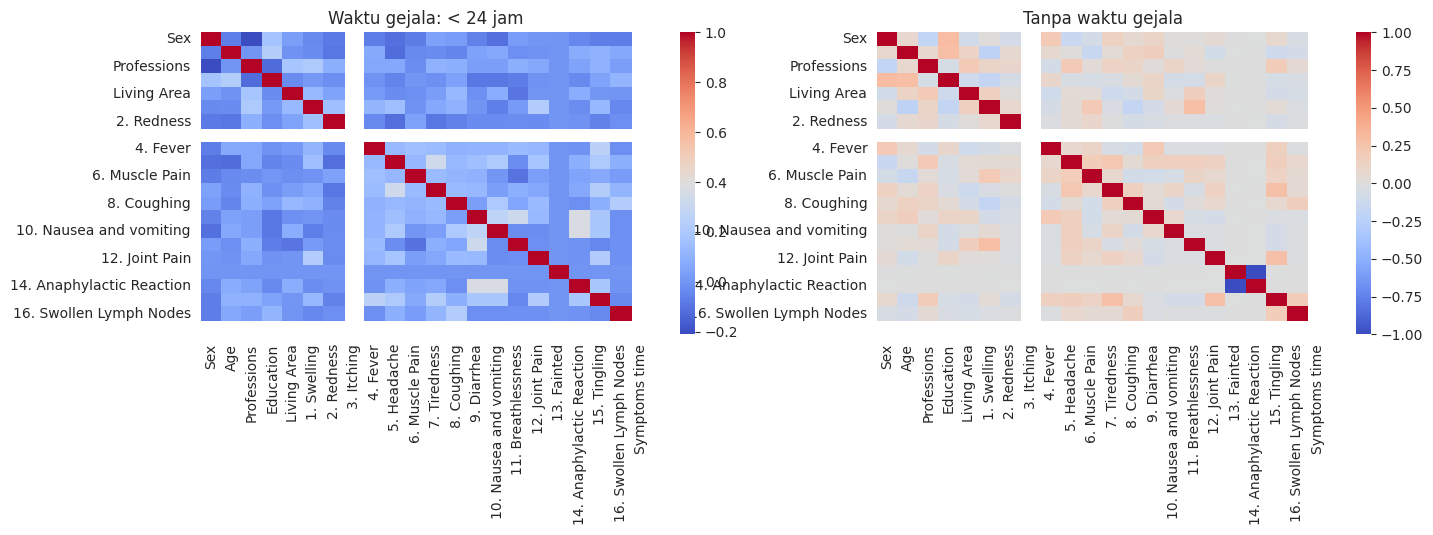

In [21]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(std_data[std_data['Symptoms time']==0][std_data.columns].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Tanpa waktu gejala')
ax = sns.heatmap(std_data[std_data['Symptoms time']==1][std_data.columns].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Waktu gejala: < 24 jam')


Text(0.5, 1.0, 'Waktu gejala: 24-72 jam')

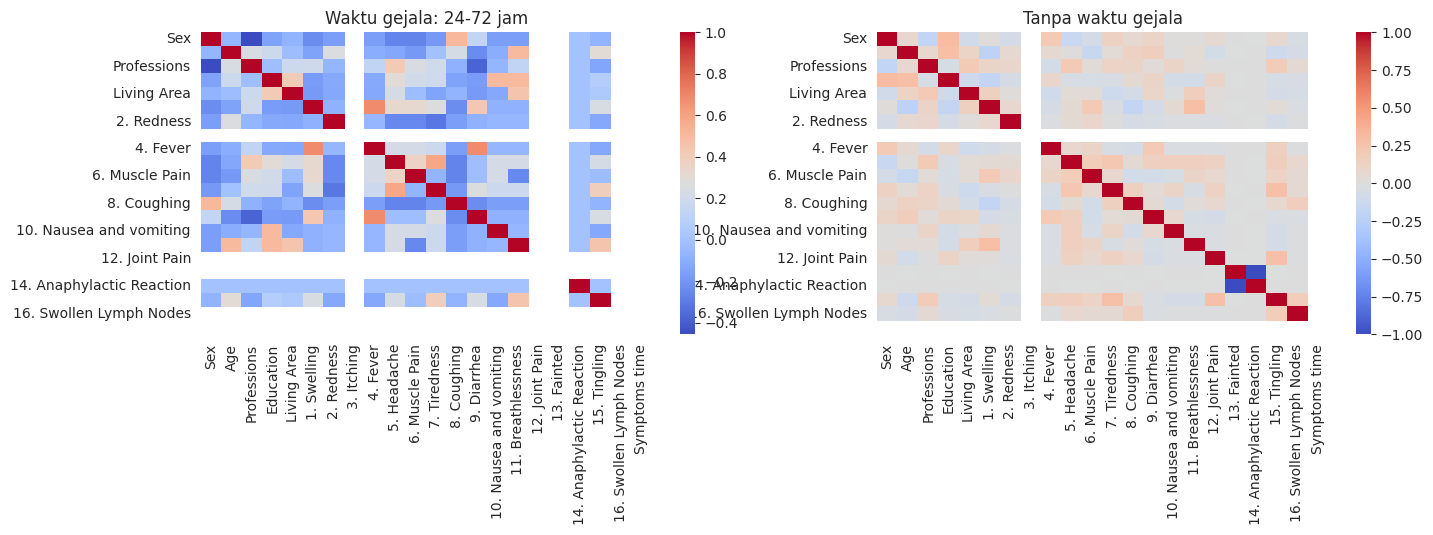

In [22]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(std_data[std_data['Symptoms time']==0][std_data.columns].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Tanpa waktu gejala')
ax = sns.heatmap(std_data[std_data['Symptoms time']==2][std_data.columns].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Waktu gejala: 24-72 jam')

Text(0.5, 1.0, 'Waktu gejala: lebih dari 72 jam')

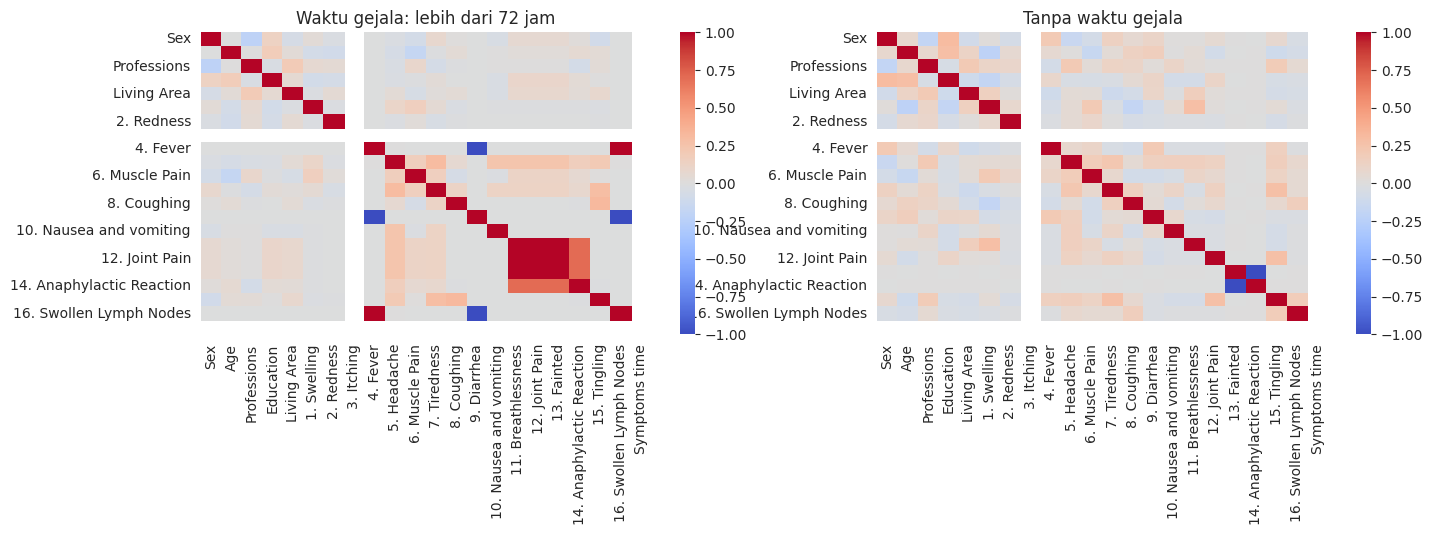

In [23]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(std_data[std_data['Symptoms time']==0][std_data.columns].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Tanpa waktu gejala')
ax = sns.heatmap(std_data[std_data['Symptoms time']==3][std_data.columns].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Waktu gejala: lebih dari 72 jam')

Text(0.5, 1.0, 'Waktu gejala: 24-72 jam')

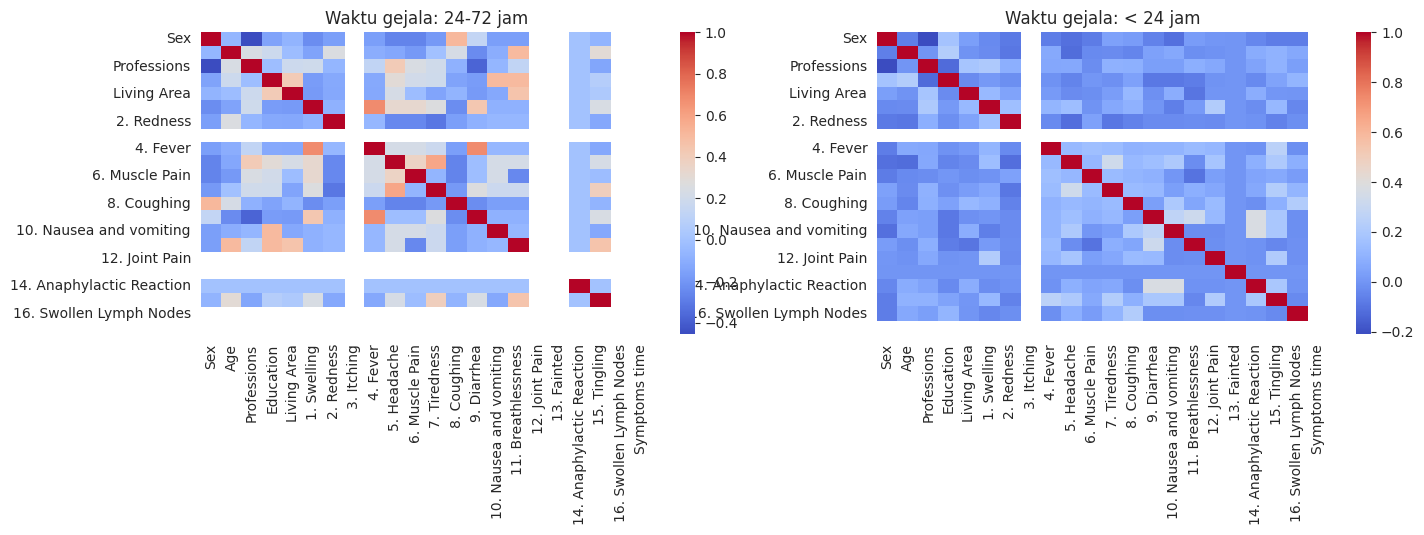

In [24]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(std_data[std_data['Symptoms time']==1][std_data.columns].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Waktu gejala: < 24 jam')
ax = sns.heatmap(std_data[std_data['Symptoms time']==2][std_data.columns].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Waktu gejala: 24-72 jam')

Text(0.5, 1.0, 'Waktu gejala: > 72 jam')

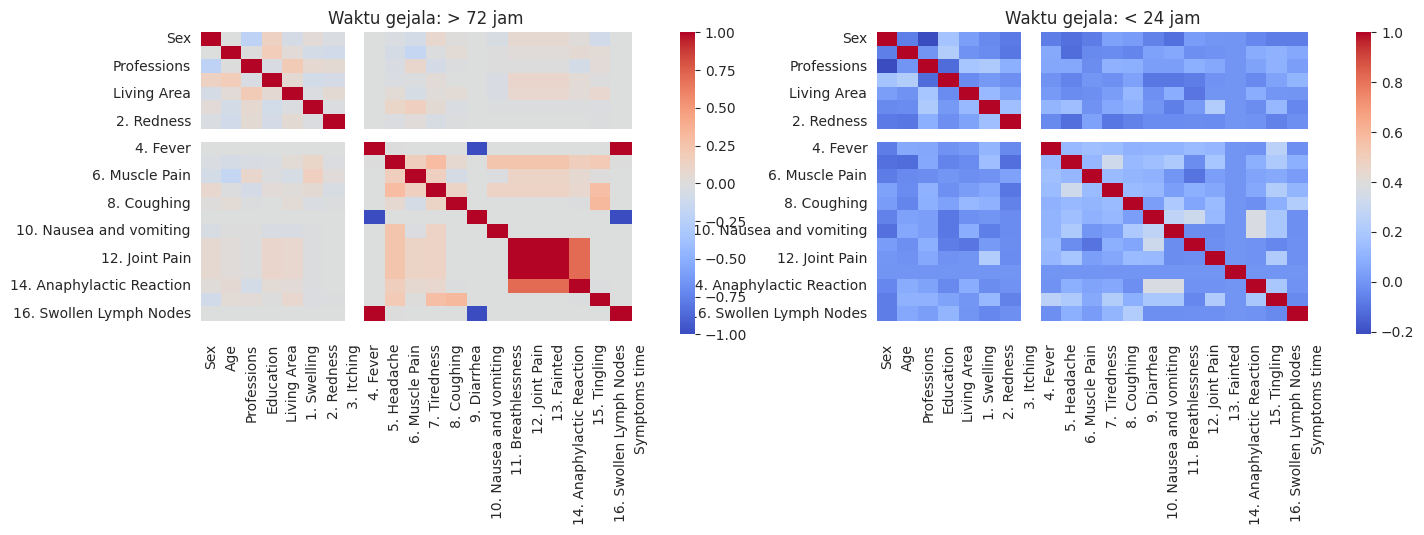

In [25]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(std_data[std_data['Symptoms time']==1][std_data.columns].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Waktu gejala: < 24 jam')
ax = sns.heatmap(std_data[std_data['Symptoms time']==3][std_data.columns].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Waktu gejala: > 72 jam')

Text(0.5, 1.0, 'Waktu gejala: > 72 jam')

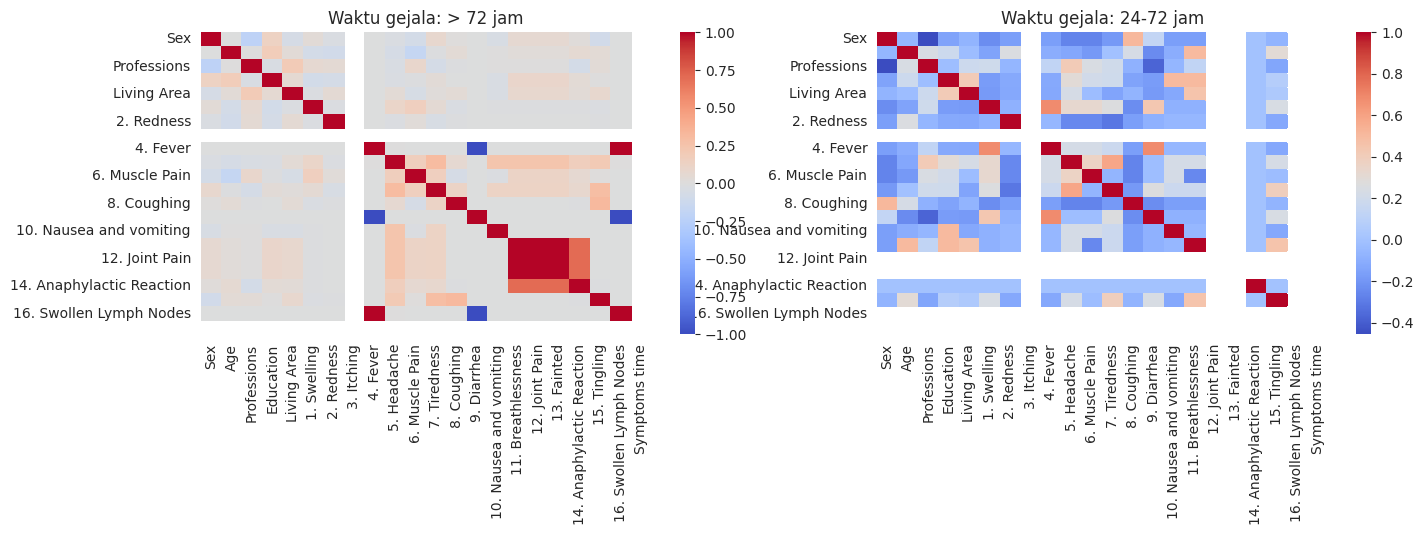

In [26]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(std_data[std_data['Symptoms time']==2][std_data.columns].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Waktu gejala: 24-72 jam')
ax = sns.heatmap(std_data[std_data['Symptoms time']==3][std_data.columns].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Waktu gejala: > 72 jam')

In [27]:
std_data = std_data.drop(['3. Itching'], axis = 1)
std_data = std_data.drop(['12. Joint Pain'], axis = 1)
std_data = std_data.drop(['13. Fainted'], axis = 1)

Split Data

Text(0.5, 1.0, 'Waktu gejala: < 24 jam')

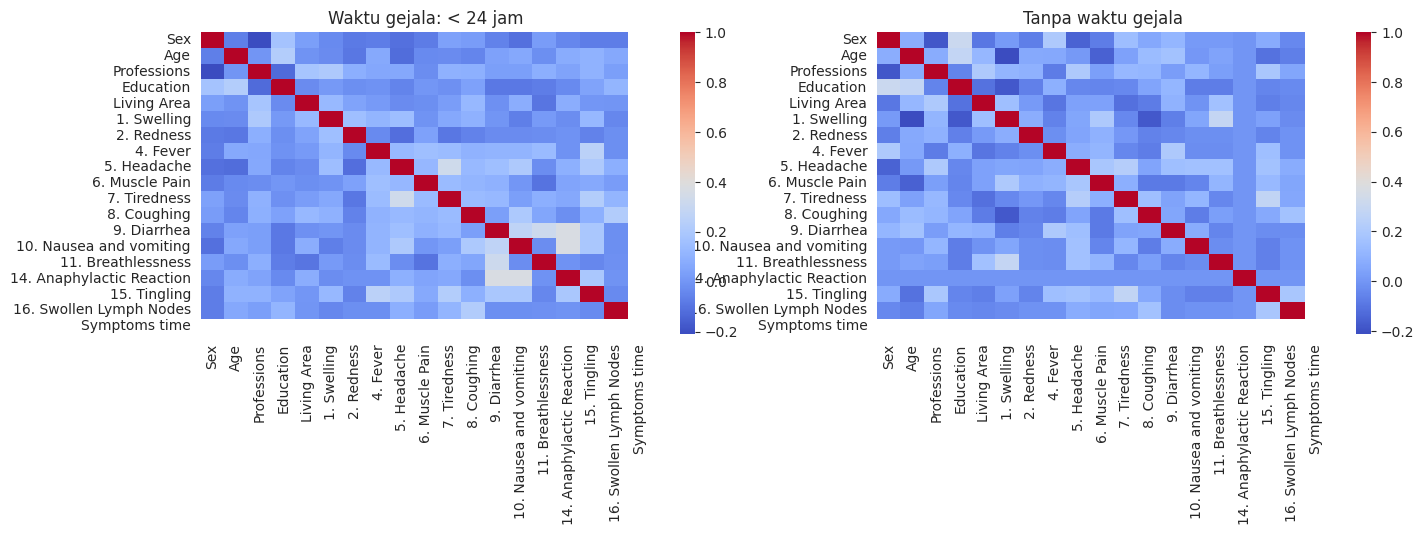

In [28]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(std_data[std_data['Symptoms time']==0][std_data.columns].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Tanpa waktu gejala')
ax = sns.heatmap(std_data[std_data['Symptoms time']==1][std_data.columns].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Waktu gejala: < 24 jam')


Text(0.5, 1.0, 'Waktu gejala: 24-72 jam')

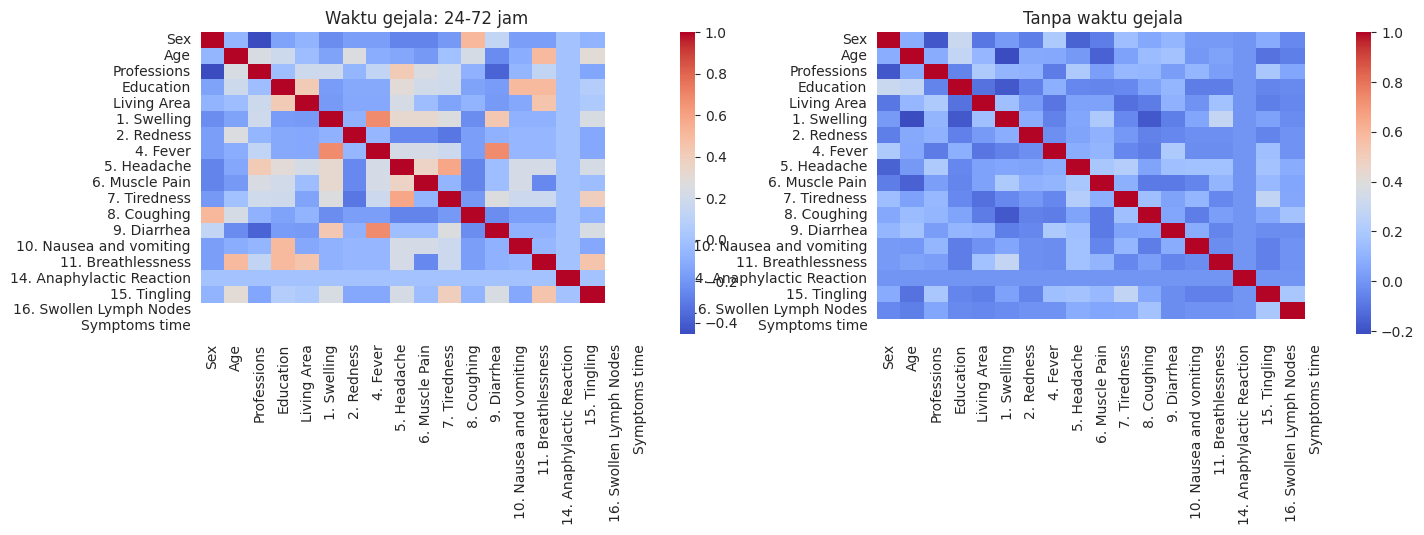

In [29]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(std_data[std_data['Symptoms time']==0][std_data.columns].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Tanpa waktu gejala')
ax = sns.heatmap(std_data[std_data['Symptoms time']==2][std_data.columns].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Waktu gejala: 24-72 jam')

Text(0.5, 1.0, 'Waktu gejala: lebih dari 72 jam')

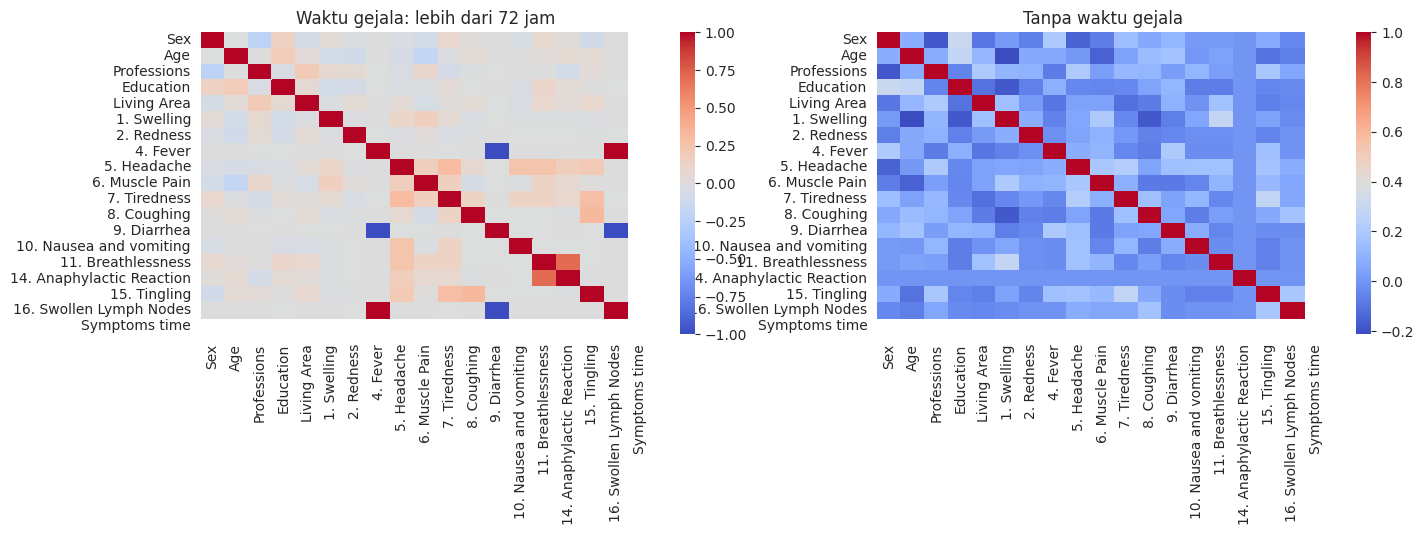

In [30]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(std_data[std_data['Symptoms time']==0][std_data.columns].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Tanpa waktu gejala')
ax = sns.heatmap(std_data[std_data['Symptoms time']==3][std_data.columns].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Waktu gejala: lebih dari 72 jam')

Text(0.5, 1.0, 'Waktu gejala: 24-72 jam')

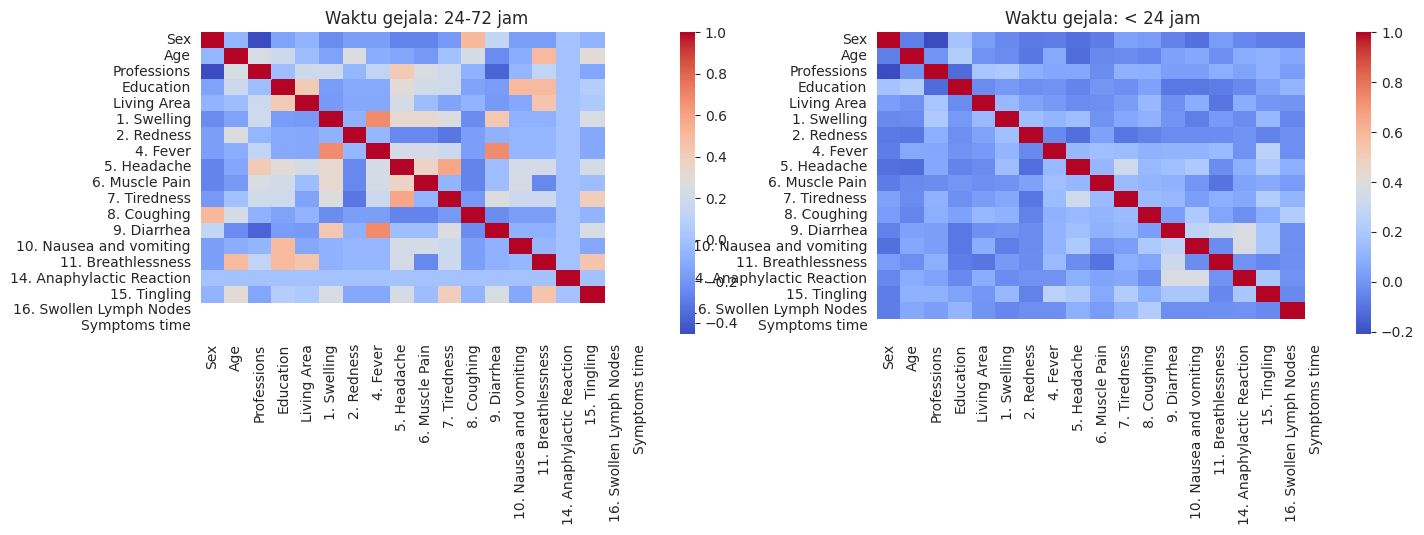

In [31]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(std_data[std_data['Symptoms time']==1][std_data.columns].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Waktu gejala: < 24 jam')
ax = sns.heatmap(std_data[std_data['Symptoms time']==2][std_data.columns].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Waktu gejala: 24-72 jam')

Text(0.5, 1.0, 'Waktu gejala: > 72 jam')

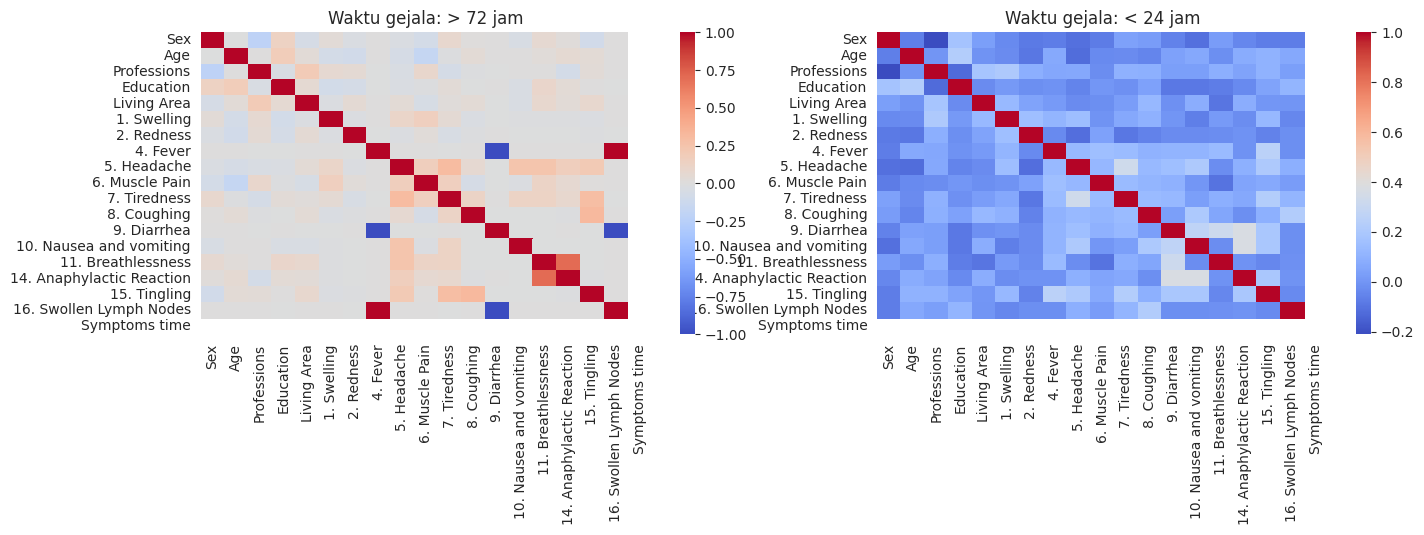

In [32]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(std_data[std_data['Symptoms time']==1][std_data.columns].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Waktu gejala: < 24 jam')
ax = sns.heatmap(std_data[std_data['Symptoms time']==3][std_data.columns].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Waktu gejala: > 72 jam')

Text(0.5, 1.0, 'Waktu gejala: > 72 jam')

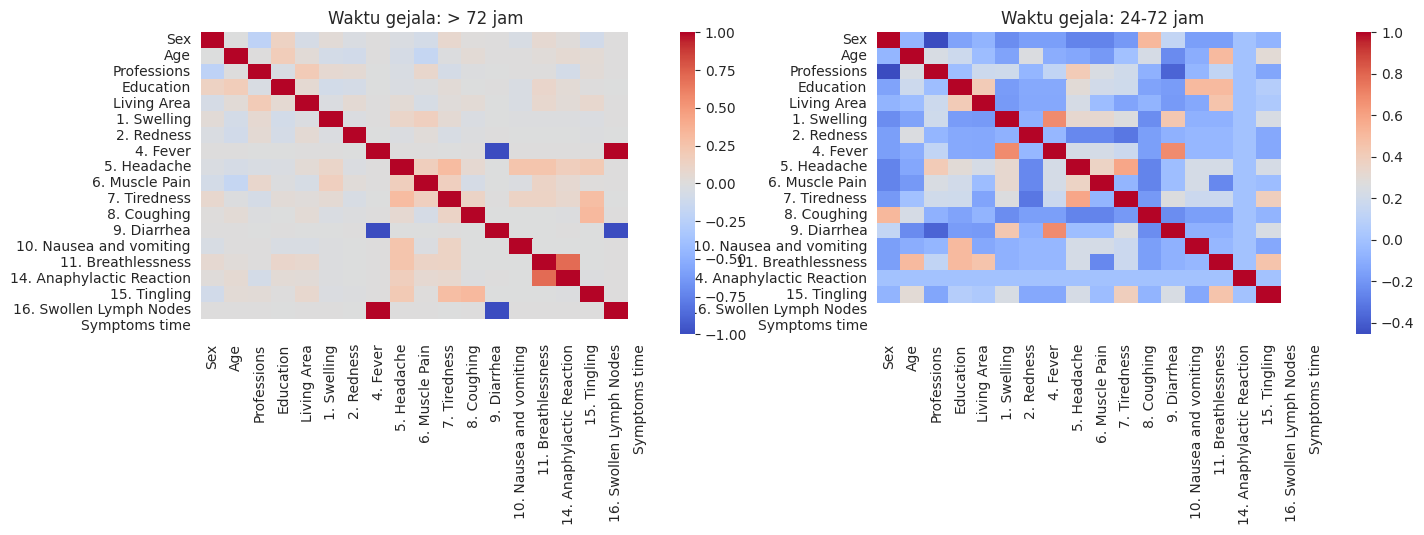

In [33]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(std_data[std_data['Symptoms time']==2][std_data.columns].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Waktu gejala: 24-72 jam')
ax = sns.heatmap(std_data[std_data['Symptoms time']==3][std_data.columns].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Waktu gejala: > 72 jam')

In [34]:
from sklearn import model_selection

In [35]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(std_data.drop(columns=['Symptoms time']), std_data[['Symptoms time']], test_size=0.33, random_state=69)
print("Jumlah Training Data : ", len(X_train), " | Jumlah Test Data : ", len(X_test))

#X_train = std_data.drop(std_data.columns[0], axis=1)
#y_train = std_data.drop(std_data.columns[1:11], axis=1)
#X_test = std_data_test

Jumlah Training Data :  562  | Jumlah Test Data :  278


# Membangun Model

## K-Nearest Neighbor

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
modelKnn = neighbors.KNeighborsClassifier(n_neighbors=3)

print(X_train)
print(y_train)

modelKnn.fit(X_train, y_train)

y_predKnn = modelKnn.predict(X_test)
print(y_predKnn)

          Sex       Age  ...  15. Tingling  16. Swollen Lymph Nodes
732 -0.688247 -0.854540  ...     -0.272339                -0.069171
191 -0.688247 -0.344729  ...     -0.272339                -0.069171
586 -0.688247 -0.344729  ...     -0.272339                -0.069171
319 -0.688247 -0.344729  ...     -0.272339                -0.069171
414  1.452966  0.165082  ...     -0.272339                -0.069171
..        ...       ...  ...           ...                      ...
439 -0.688247 -0.854540  ...      3.671888                -0.069171
602 -0.688247 -0.344729  ...     -0.272339                -0.069171
619 -0.688247 -0.854540  ...     -0.272339                -0.069171
203 -0.688247  1.694514  ...     -0.272339                -0.069171
54  -0.688247 -1.364351  ...     -0.272339                -0.069171

[562 rows x 18 columns]
     Symptoms time
732              3
191              3
586              2
319              3
414              3
..             ...
439              0
602    

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


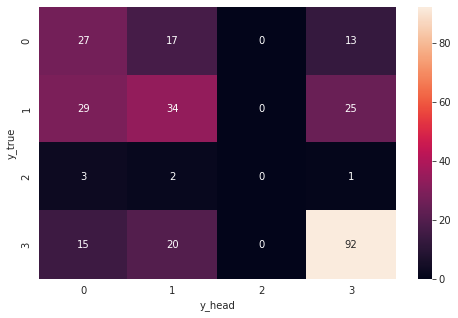

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predKnn)

import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predKnn), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predKnn))

              precision    recall  f1-score   support

           0       0.36      0.47      0.41        57
           1       0.47      0.39      0.42        88
           2       0.00      0.00      0.00         6
           3       0.70      0.72      0.71       127

    accuracy                           0.55       278
   macro avg       0.38      0.40      0.39       278
weighted avg       0.54      0.55      0.54       278



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Melakukan Cross Validation

In [40]:
from sklearn.model_selection import cross_val_score
import numpy as np

#create a new KNN model
knn_cv = neighbors.KNeighborsClassifier(n_neighbors=3)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.63716814 0.59292035 0.60714286 0.58035714 0.66071429]
cv_scores mean:0.6156605562579014


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [41]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters to tune
n_neighbors = list(range(1,100))
p = [1,2]
weights = ['uniform', 'distance']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p, weights=weights)

#Making model
clf = GridSearchCV(modelKnn, hyperparameters, cv=10)
best_model = clf.fit(X_train, y_train)

#Best Hyperparameters Value
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best weights:', best_model.best_estimator_.get_params()['weights'])

#Predict testing set
predicted2 = best_model.predict(X_test)

#Check performance using accuracy
print(accuracy_score(y_test, predicted2))

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

Best p: 2
Best n_neighbors: 8
Best weights: distance
0.5215827338129496


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [42]:
best_model.score(X_test, y_test)

0.5215827338129496

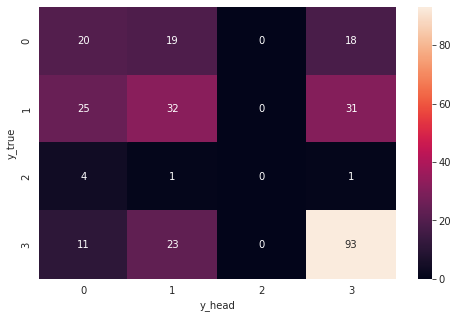

In [43]:
y_predKnnCv = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_predKnnCv, labels=best_model.classes_)

import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predKnnCv), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [44]:
print(classification_report(y_test, y_predKnnCv))

              precision    recall  f1-score   support

           0       0.33      0.35      0.34        57
           1       0.43      0.36      0.39        88
           2       0.00      0.00      0.00         6
           3       0.65      0.73      0.69       127

    accuracy                           0.52       278
   macro avg       0.35      0.36      0.36       278
weighted avg       0.50      0.52      0.51       278



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest

Membangun model

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
modelRf = RandomForestClassifier(random_state=0)
modelRf.fit(X_train, y_train)
modelRf.get_params()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

Predict test data

In [47]:
y_predRf = modelRf.predict(X_test)
y_predRf

array([1, 1, 1, 3, 3, 3, 0, 3, 0, 1, 1, 3, 1, 0, 1, 3, 1, 1, 3, 1, 0, 3,
       1, 3, 3, 3, 3, 1, 1, 0, 3, 3, 1, 1, 3, 3, 3, 0, 3, 3, 0, 1, 3, 1,
       3, 1, 1, 3, 3, 3, 0, 1, 0, 1, 3, 3, 3, 1, 0, 3, 1, 3, 0, 1, 0, 3,
       3, 0, 1, 3, 3, 3, 3, 1, 1, 3, 0, 3, 3, 0, 0, 3, 3, 1, 3, 0, 3, 0,
       0, 0, 3, 0, 3, 1, 3, 1, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 1, 3,
       1, 1, 3, 3, 3, 1, 0, 0, 3, 0, 1, 3, 0, 3, 1, 3, 3, 3, 3, 3, 0, 3,
       3, 0, 0, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 1,
       3, 3, 3, 0, 0, 1, 3, 1, 3, 3, 1, 3, 1, 3, 0, 3, 3, 3, 1, 3, 0, 3,
       1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 3, 3, 1, 1, 3,
       3, 0, 1, 3, 1, 0, 1, 3, 3, 3, 3, 3, 0, 3, 1, 1, 1, 3, 1, 1, 1, 3,
       1, 0, 3, 3, 1, 1, 3, 3, 1, 0, 1, 0, 1, 0, 3, 3, 3, 3, 1, 1, 1, 3,
       3, 1, 3, 0, 3, 1, 3, 1, 0, 3, 3, 1, 1, 3, 0, 3, 1, 1, 3, 0, 0, 0,
       1, 3, 1, 0, 3, 3, 3, 3, 3, 0, 3, 3, 1, 1])

Membuat konfusion matrix

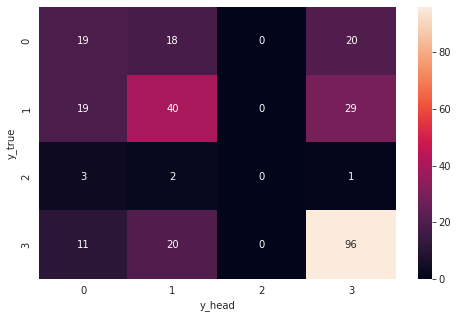

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predRf)

import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predRf), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

Akurasi dari random forest

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predRf))

              precision    recall  f1-score   support

           0       0.37      0.33      0.35        57
           1       0.50      0.45      0.48        88
           2       0.00      0.00      0.00         6
           3       0.66      0.76      0.70       127

    accuracy                           0.56       278
   macro avg       0.38      0.39      0.38       278
weighted avg       0.53      0.56      0.54       278



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross Validation

In [50]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 233, 266, 300, 333, 366, 400, 433, 466, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [51]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 14, 18, 22, 26, 30,
                                                      34, 38, 42, 46, 50,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 233, 266, 300,
                                                         333, 366, 400, 433,
                                                         466, 500]},
                   random_state=42, verbose=2)

In [52]:
rf_random.best_score_

0.629887738460955

In [53]:
y_predRfCv = rf_random.predict(X_test)

Membuat konfusion matrix

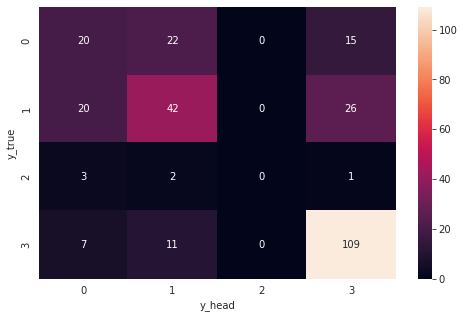

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predRfCv)

import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predRfCv), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

Akurasi dari random forest

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predRfCv))

              precision    recall  f1-score   support

           0       0.40      0.35      0.37        57
           1       0.55      0.48      0.51        88
           2       0.00      0.00      0.00         6
           3       0.72      0.86      0.78       127

    accuracy                           0.62       278
   macro avg       0.42      0.42      0.42       278
weighted avg       0.58      0.62      0.60       278



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVM

Membuat Model

In [56]:
from sklearn.svm import SVC

In [57]:
modelSvm = SVC(random_state=0)
modelSvm.fit(X_train,y_train)

y_predSvm = modelSvm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


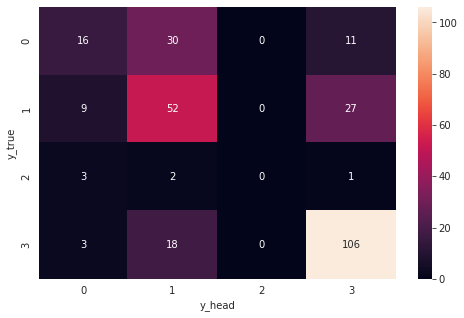

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predSvm)

import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predSvm), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [59]:
print(classification_report(y_test,y_predSvm))

              precision    recall  f1-score   support

           0       0.52      0.28      0.36        57
           1       0.51      0.59      0.55        88
           2       0.00      0.00      0.00         6
           3       0.73      0.83      0.78       127

    accuracy                           0.63       278
   macro avg       0.44      0.43      0.42       278
weighted avg       0.60      0.63      0.60       278



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf','linear','polynomial','sigmoid']}

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)

In [63]:
# Proses ini bisa memakan waktu yang lama, tergantung dari ukuran data dan banyaknya kombinasi parameter model
grid.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Fitting 5 folds for each of 80 candidates, totalling 400 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'polynomial', 'sigmoid']},
             verbose=1)

In [64]:
y_predSvmCv = grid.predict(X_test)


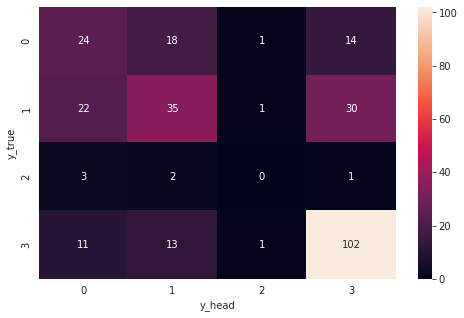

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predSvmCv)

import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predSvmCv), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [66]:
print(classification_report(y_test,y_predSvmCv))

              precision    recall  f1-score   support

           0       0.40      0.42      0.41        57
           1       0.51      0.40      0.45        88
           2       0.00      0.00      0.00         6
           3       0.69      0.80      0.74       127

    accuracy                           0.58       278
   macro avg       0.40      0.41      0.40       278
weighted avg       0.56      0.58      0.57       278

